In [10]:
import pandas as pd
import spacy
from tqdm import tqdm
from pandas import DataFrame
import glob
import spacy
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [503]:
nlp = spacy.load('en_core_web_md')

In [ ]:
tweets = pd.read_csv('data/full_dataset.tsv', chunksize = 1000)

In [ ]:
next(tweets)

## Importing and cleaning the small tweet dataset from December and January

In [49]:
small_tweet_set = pd.read_csv('data/COVID-19/COVID.csv')

In [50]:
small_tweet_set.head()

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,...,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783...,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on ho...,Tweet,Twitter for iPhone,0,0,NaN,NaN,...,"""1556856595""",Giuseppe Gentile,Giussi92,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50
1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417...,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press confe...,Tweet,Twitter Web App,0,0,Los Angeles CA USA,NaN,...,"""113738369""",London After Midnight,LAMofficial,London After Midnight is a music project by wr...,Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17
2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417...,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coron...",Tweet,Twitter Web App,23,64,"Miami, FL",NaN,...,"""17980523""",Bill Mitchell,mitchellvii,Host of YourVoice™ America at http://yourvoice...,Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,09 Dec 2008 01:54:21
3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/123341...,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to ...",Tweet,Twitter for iPhone,4,11,NYC and the North Fork,NaN,...,"""2199541""",Helen Kennedy,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston He...,Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,25 Mar 2007 19:14:46
4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274...,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow h...,Tweet,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,NaN,...,"""17919393""",Steve Herman,W7VOA,@WhiteHouse bureau chief @VOANews. Member: @aa...,Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,06 Dec 2008 08:56:45


In [51]:
small_tweet_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60160 entries, 0 to 60159
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Tweet Id                    60160 non-null  object 
 1   Tweet URL                   60160 non-null  object 
 2   Tweet Posted Time (UTC)     60160 non-null  object 
 3   Tweet Content               60160 non-null  object 
 4   Tweet Type                  60160 non-null  object 
 5   Client                      60160 non-null  object 
 6   Retweets Received           60160 non-null  int64  
 7   Likes Received              60160 non-null  int64  
 8   Tweet Location              40620 non-null  object 
 9   Lat                         19 non-null     float64
 10  Long                        19 non-null     float64
 11  Tweet Language              59012 non-null  object 
 12  User Id                     60160 non-null  object 
 13  Name                        601

In [52]:
small_tweet_set = small_tweet_set[['Tweet Posted Time (UTC)', 'Tweet Id', 'Tweet Content', 'Tweet Location', 'Tweet Language']]

In [53]:
small_tweet_set.head()

,Tweet Posted Time (UTC),Tweet Id,Tweet Content,Tweet Location,Tweet Language
0,28 Feb 2020 15:44:49,"""1233417783175778304""",Also the entire Swiss Football League is on ho...,NaN,English
1,28 Feb 2020 15:44:40,"""1233417742520332290""",World Health Org Official: Trump’s press confe...,Los Angeles CA USA,English
2,28 Feb 2020 15:44:39,"""1233417741027225602""","I mean, Liberals are cheer-leading this #Coron...","Miami, FL",English
3,28 Feb 2020 15:44:29,"""1233417699264356357""","Under repeated questioning, Pompeo refuses to ...",NYC and the North Fork,English
4,28 Feb 2020 15:44:23,"""1233417674274807808""",#coronavirus comments now from @larry_kudlow h...,James S. Brady Press Briefing Room,English


In [54]:
small_tweet_set.columns = ['created_at', 'id', 'full_text', 'place', 'lang']

small_tweet_set.created_at = pd.to_datetime(small_tweet_set.created_at)

small_tweet_set.id = small_tweet_set.id.str.replace('"','')

small_tweet_set.full_text = small_tweet_set.full_text.str.lower()

In [55]:
small_tweet_set = small_tweet_set[small_tweet_set['lang']=='English'].drop(columns='lang')

In [56]:
small_tweet_set.head()

,created_at,id,full_text,place
0,2020-02-28 15:44:49,1233417783175778304,also the entire swiss football league is on ho...,NaN
1,2020-02-28 15:44:40,1233417742520332290,world health org official: trump’s press confe...,Los Angeles CA USA
2,2020-02-28 15:44:39,1233417741027225602,"i mean, liberals are cheer-leading this #coron...","Miami, FL"
3,2020-02-28 15:44:29,1233417699264356357,"under repeated questioning, pompeo refuses to ...",NYC and the North Fork
4,2020-02-28 15:44:23,1233417674274807808,#coronavirus comments now from @larry_kudlow h...,James S. Brady Press Briefing Room


In [57]:
small_tweet_set.shape

(33174, 4)

In [58]:
small_tweet_set.to_pickle('data/cleaned_tweet_df/small_tweet_set_cleaned.csv')

## Importing and cleaning the Tweet Datasets posted to Kaggle spanning March and April

In [59]:
def kaggle_cleaner(file_list):
    df = pd.concat(file_list, ignore_index=True)
    df = df[['created_at', 'status_id', 'text', 'place_full_name', 'lang']]
    df = df[df['lang']=='en'].drop(columns='lang')
    df.columns = ['created_at', 'id', 'full_text', 'place']
    df.created_at = pd.to_datetime(df.created_at)
    df.full_text = df.full_text.str.lower()
    return df

In [60]:
clean_kaggle_tweets1 = []
bad_kaggle_files_list1 = []
for file in tqdm(glob.glob('data/kaggle_tweet_sets/coronavirus-covid19-tweets/*')):
    try:
        clean_kaggle_tweets1.append(pd.read_csv(file))
    except:
        bad_kaggle_files_list1.append(file)

100%|██████████| 18/18 [01:15<00:00,  4.20s/it]


In [61]:
bad_kaggle_files_list1

[]

In [62]:
clean_kaggle_tweets1 = kaggle_cleaner(clean_kaggle_tweets1)

In [63]:
clean_kaggle_tweets1.to_pickle('data/cleaned_tweet_df/clean_kaggle1.csv')

In [64]:
clean_kaggle_tweets1.head()

,created_at,id,full_text,place
2,2020-03-09 00:00:00+00:00,1236803889497886720,during a health scare like the #coronavirusout...,NaN
3,2020-03-09 00:00:14+00:00,1236803946619875328,@twitter please update reporting to include fa...,NaN
4,2020-03-09 00:00:28+00:00,1236804006380482566,germ guardian pluggable air purifier &amp; san...,NaN
5,2020-03-09 00:00:36+00:00,1236804038147993600,simple math proves the chinese government is l...,NaN
8,2020-03-09 00:00:42+00:00,1236804066304352257,classes were suspended in the following cities...,NaN


In [65]:
clean_kaggle_tweets1.shape

(6788604, 4)

In [66]:
clean_kaggle_tweets2 = []
bad_kaggle_files_list2 = []
for file in tqdm(glob.glob('data/kaggle_tweet_sets/coronavirus-covid19-tweets-early-april/*')):
    try:
        clean_kaggle_tweets2.append(pd.read_csv(file))
    except:
        bad_kaggle_files_list2.append(file)

100%|██████████| 18/18 [00:43<00:00,  2.42s/it]


In [67]:
bad_kaggle_files_list2

[]

In [68]:
clean_kaggle_tweets2 = kaggle_cleaner(clean_kaggle_tweets2)

In [69]:
clean_kaggle_tweets2.to_pickle('data/cleaned_tweet_df/clean_kaggle2.csv')

In [70]:
clean_kaggle_tweets2.head()

,created_at,id,full_text,place
1,2020-04-05 00:00:00+00:00,1246588359688019970,has anyone tried playing nickleback at the vi...,"West Palm Beach, FL"
2,2020-04-05 00:00:00+00:00,1246588360035991552,global superstar @pink and her son jameson are...,NaN
5,2020-04-05 00:00:00+00:00,1246588360069529601,community kitchens supply hot meals to the poo...,NaN
9,2020-04-05 00:00:00+00:00,1246588360115679233,“take care of your mental health just like you...,NaN
11,2020-04-05 00:00:00+00:00,1246588360115851267,@bowergroupasia has an update regarding latest...,NaN


In [71]:
clean_kaggle_tweets2.shape

(4827372, 4)

In [72]:
clean_kaggle_tweets3 = []
bad_kaggle_files_list3 = []
for file in tqdm(glob.glob('data/kaggle_tweet_sets/coronavirus-covid19-tweets-late-april/*')):
    try:
        clean_kaggle_tweets3.append(pd.read_csv(file))
    except:
        bad_kaggle_files_list3.append(file)

100%|██████████| 15/15 [00:29<00:00,  1.97s/it]


In [73]:
bad_kaggle_files_list3

[]

In [74]:
clean_kaggle_tweets3 = kaggle_cleaner(clean_kaggle_tweets3)
clean_kaggle_tweets3.to_pickle('data/cleaned_tweet_df/clean_kaggle3.csv')

In [75]:
clean_kaggle_tweets3.head()

,created_at,id,full_text,place
5,2020-04-30 00:00:00+00:00,1255648059154812928,attention seattle shoppers! grocery stores are...,NaN
8,2020-04-30 00:00:00+00:00,1255648057296748546,"microsoft sees digital reboot from pandemic, p...",NaN
10,2020-04-30 00:00:00+00:00,1255648057670041600,"despite #covid19 impacts, the victoria street ...",NaN
22,2020-04-30 00:00:00+00:00,1255648057846366209,right now on nightside - china expert bu prof....,NaN
25,2020-04-30 00:00:00+00:00,1255648057917661187,if there’s an ideal person to provide insight ...,NaN


In [76]:
clean_kaggle_tweets3.shape

(3306413, 4)

## Importing Tweet ID's from a dataset that will need to be hydrated using a Twitter API

In [ ]:
tweet_ids = pd.read_csv('data/full_dataset.tsv', sep='\t')

In [ ]:
tweet_ids.head()

In [ ]:
tweet_ids = tweet_ids.iloc[:,0]

In [ ]:
tweet_ids.head()

In [ ]:
tweet_ids.shape

In [ ]:
tweet_ids = tweet_ids.sample(frac=1)

In [ ]:
tweet_ids.head()

In [ ]:
tweet_ids.shape

In [ ]:
tweet_ids.to_csv('data/full_dataset_tweet_ids.csv', index=False)

In [ ]:
i = 0
filename = 'chunk_'
chunks = pd.read_csv('data/full_dataset_tweet_ids.csv', chunksize = 7000000)
for chunk in chunks:
    ## processing steps here
    chunk.to_csv('data/id_chunks/' + filename + str(i) + '.csv', index = False)
    i += 1

In [ ]:
tweet_ids_small = tweet_ids.iloc[:50,]

In [ ]:
tweet_ids_small.to_csv('data/small_dataset_tweet_ids.txt', index=False)

In [510]:
small_tweets = pd.read_json('data/hydrate_test.jsonl', lines=True)

In [511]:
small_tweets.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_permalink,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities
0,2020-01-09 02:56:17+00:00,1215104980908236800,1215104980908236800,Se las traen los Coronavirus https://t.co/thz...,False,"[0, 29]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,"{'url': 'https://t.co/thzfxg3aWh', 'expanded':...",{'created_at': 'Thu Jan 09 02:24:51 +0000 2020...,4,10,False,False,0.0,es,NaN,NaN
1,2020-01-09 04:48:42+00:00,1215133271475908608,1215133271475908608,RT @business: An alarming pneumonia outbreak i...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,35,0,False,False,NaN,en,{'created_at': 'Thu Jan 09 04:48:03 +0000 2020...,NaN
2,2020-01-04 05:23:50+00:00,1213330173736738817,1213330173736738816,"@shehryar_taseer That’s 💯 true , \nCorona viru...",False,"[17, 206]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.212680e+18,1.212680e+18,...,NaN,NaN,0,0,False,False,NaN,en,NaN,NaN
3,2020-01-09 10:38:40+00:00,1215221343479726081,1215221343479726080,@tezuma75 Why #CCP keep on saying unknown caus...,False,"[10, 252]","{'hashtags': [{'text': 'CCP', 'indices': [14, ...","<a href=""http://twitter.com/download/android"" ...",1.213382e+18,1.213382e+18,...,NaN,NaN,0,0,False,False,NaN,en,NaN,NaN
4,2020-01-09 00:53:24+00:00,1215074056313028608,1215074056313028608,RT @Echinanews: #BREAKING: The unidentified pn...,False,"[0, 140]","{'hashtags': [{'text': 'BREAKING', 'indices': ...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,NaN,NaN,17,0,False,False,NaN,en,{'created_at': 'Thu Jan 09 00:51:04 +0000 2020...,NaN


In [512]:
small_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 38 non-null     datetime64[ns, UTC]
 1   id                         38 non-null     int64              
 2   id_str                     38 non-null     int64              
 3   full_text                  38 non-null     object             
 4   truncated                  38 non-null     bool               
 5   display_text_range         38 non-null     object             
 6   entities                   38 non-null     object             
 7   source                     38 non-null     object             
 8   in_reply_to_status_id      3 non-null      float64            
 9   in_reply_to_status_id_str  3 non-null      float64            
 10  in_reply_to_user_id        3 non-null      float64            
 11  in_reply

In [513]:
small_tweets.lang.value_counts(ascending=False)

en    26
es     6
th     2
ca     2
fr     1
nl     1
Name: lang, dtype: int64

In [514]:
small_tweets.geo.value_counts(ascending=False)

Series([], Name: geo, dtype: int64)

In [515]:
small_tweets = small_tweets[['created_at', 'id', 'full_text', 'geo', 'place', 'lang']]

In [516]:
small_tweets.head()

,created_at,id,full_text,geo,place,lang
0,2020-01-09 02:56:17+00:00,1215104980908236800,Se las traen los Coronavirus https://t.co/thz...,NaN,NaN,es
1,2020-01-09 04:48:42+00:00,1215133271475908608,RT @business: An alarming pneumonia outbreak i...,NaN,NaN,en
2,2020-01-04 05:23:50+00:00,1213330173736738817,"@shehryar_taseer That’s 💯 true , \nCorona viru...",NaN,NaN,en
3,2020-01-09 10:38:40+00:00,1215221343479726081,@tezuma75 Why #CCP keep on saying unknown caus...,NaN,NaN,en
4,2020-01-09 00:53:24+00:00,1215074056313028608,RT @Echinanews: #BREAKING: The unidentified pn...,NaN,NaN,en


In [517]:
small_tweets = small_tweets[small_tweets['lang']=='en']

In [518]:
small_tweets.shape

(26, 6)

In [ ]:
i = 0
filename = 'test_chunk_'
chunks = pd.read_json('data/hydrate_test.jsonl', lines=True, chunksize = 1000)
for chunk in chunks:
    chunk = chunk[['created_at', 'id', 'full_text', 'geo', 'place', 'lang']]
    chunk = chunk[chunk['lang']=='en']
    chunk.to_csv('data/' + filename + str(i) + '.csv', index = False)
    i += 1

In [77]:
tweet_chunk0 = pd.read_json('data/id_chunks/chunk_0_text.jsonl', lines=True)

ValueError: Expected object or value

In [ ]:
i = 0
filename = 'clean_tweet_chunk0_'
chunks = pd.read_json('data/id_chunks/chunk_0_text.jsonl', lines=True, chunksize = 50000)
for chunk in chunks:
    chunk = chunk[['created_at', 'id', 'full_text', 'geo', 'place', 'lang']]
    chunk = chunk[chunk['lang']=='en']
    chunk.to_csv('data/clean_chunks/chunks0/' + filename + str(i) + '.csv', index = False)
    i += 1

In [ ]:
clean_tweet_chunks = []
bad_files_list = []
for file in glob.glob('data/clean_chunks/chunks0/*'):
    try:
        clean_tweet_chunks.append(pd.read_csv(file))
    except:
        bad_files_list.append(file)

In [ ]:
bad_files_list

In [ ]:
clean_chunks_0 = pd.concat(clean_tweet_chunks, ignore_index=True)

In [ ]:
clean_chunks_0.head()

In [ ]:
clean_chunks_0.shape

In [ ]:
clean_chunks_0.to_pickle('data/clean_chunks/clean_chunks_0.csv')

In [ ]:
i = 0
filename = 'clean_tweet_chunk1_'
chunks = pd.read_json('data/id_chunks/chunk_1_text.jsonl', lines=True, chunksize = 50000)
for chunk in chunks:
    chunk = chunk[['created_at', 'id', 'full_text', 'geo', 'place', 'lang']]
    chunk = chunk[chunk['lang']=='en']
    chunk.to_csv('data/clean_chunks/chunks1/' + filename + str(i) + '.csv', index = False)
    i += 1

In [ ]:
clean_tweet_chunks1 = []
bad_files_list1 = []
for file in glob.glob('data/clean_chunks/chunks1/*'):
    try:
        clean_tweet_chunks1.append(pd.read_csv(file))
    except:
        bad_files_list1.append(file)

In [ ]:
bad_files_list1

In [ ]:
clean_chunks_1 = pd.concat(clean_tweet_chunks1, ignore_index=True)

In [ ]:
clean_chunks_1.head()

In [ ]:
clean_chunks_1.shape

In [ ]:
clean_chunks_1.to_pickle('data/clean_chunks/clean_chunks_1.csv')

In [24]:
i = 0
filename = 'clean_tweet_chunk2_'
chunks = pd.read_json('data/id_chunks/chunk_2_text.jsonl', lines=True, chunksize = 50000)
for chunk in chunks:
    chunk = chunk[['created_at', 'id', 'full_text', 'geo', 'place', 'lang']]
    chunk = chunk[chunk['lang']=='en']
    chunk.to_csv('data/clean_chunks/chunks2/' + filename + str(i) + '.csv', index = False)
    i += 1

In [28]:
clean_tweet_chunks2 = []
bad_files_list2 = []
for file in glob.glob('data/clean_chunks/chunks2/*'):
    try:
        clean_tweet_chunks2.append(pd.read_csv(file))
    except:
        bad_files_list2.append(file)

In [29]:
bad_files_list2

['data/clean_chunks/chunks2/clean_tweet_chunk2_36.csv',
 'data/clean_chunks/chunks2/clean_tweet_chunk2_30.csv',
 'data/clean_chunks/chunks2/clean_tweet_chunk2_54.csv',
 'data/clean_chunks/chunks2/clean_tweet_chunk2_83.csv',
 'data/clean_chunks/chunks2/clean_tweet_chunk2_56.csv',
 'data/clean_chunks/chunks2/clean_tweet_chunk2_109.csv',
 'data/clean_chunks/chunks2/clean_tweet_chunk2_115.csv',
 'data/clean_chunks/chunks2/clean_tweet_chunk2_16.csv']

In [30]:
clean_chunks_2 = pd.concat(clean_tweet_chunks2, ignore_index=True)

In [31]:
clean_chunks_2.head()
clean_chunks_2.shape

(3429989, 6)

In [32]:
clean_chunks_2.to_pickle('data/clean_chunks/clean_chunks_2.csv')

In [109]:
i = 0
filename = 'clean_tweet_chunk3_'
chunks = pd.read_json('data/id_chunks/chunk_3_text.jsonl', lines=True, chunksize = 50000)
for chunk in chunks:
    chunk = chunk[['created_at', 'id', 'full_text', 'geo', 'place', 'lang']]
    chunk = chunk[chunk['lang']=='en']
    chunk.to_csv('data/clean_chunks/chunks3/' + filename + str(i) + '.csv', index = False)
    i += 1

In [110]:
clean_tweet_chunks3 = []
bad_files_list3 = []
for file in glob.glob('data/clean_chunks/chunks3/*'):
    try:
        clean_tweet_chunks3.append(pd.read_csv(file))
    except:
        bad_files_list3.append(file)

In [111]:
bad_files_list3

['data/clean_chunks/chunks3/clean_tweet_chunk3_7.csv',
 'data/clean_chunks/chunks3/clean_tweet_chunk3_73.csv',
 'data/clean_chunks/chunks3/clean_tweet_chunk3_28.csv',
 'data/clean_chunks/chunks3/clean_tweet_chunk3_14.csv',
 'data/clean_chunks/chunks3/clean_tweet_chunk3_119.csv',
 'data/clean_chunks/chunks3/clean_tweet_chunk3_113.csv',
 'data/clean_chunks/chunks3/clean_tweet_chunk3_43.csv',
 'data/clean_chunks/chunks3/clean_tweet_chunk3_46.csv']

In [112]:
clean_chunks_3 = pd.concat(clean_tweet_chunks3, ignore_index=True)

In [113]:
clean_chunks_3.shape

(3429378, 6)

In [114]:
clean_chunks_3.to_pickle('data/clean_chunks/clean_chunks_3.csv')

In [136]:
i = 0
filename = 'clean_tweet_chunk4_'
chunks = pd.read_json('data/id_chunks/chunk_4_text.jsonl', lines=True, chunksize = 50000)
for chunk in chunks:
    chunk = chunk[['created_at', 'id', 'full_text', 'geo', 'place', 'lang']]
    chunk = chunk[chunk['lang']=='en']
    chunk.to_csv('data/clean_chunks/chunks4/' + filename + str(i) + '.csv', index = False)
    i += 1

In [137]:
clean_tweet_chunks4 = []
bad_files_list4 = []
for file in glob.glob('data/clean_chunks/chunks4/*'):
    try:
        clean_tweet_chunks4.append(pd.read_csv(file))
    except:
        bad_files_list4.append(file)

In [138]:
bad_files_list4

['data/clean_chunks/chunks4/clean_tweet_chunk4_95.csv',
 'data/clean_chunks/chunks4/clean_tweet_chunk4_68.csv',
 'data/clean_chunks/chunks4/clean_tweet_chunk4_78.csv',
 'data/clean_chunks/chunks4/clean_tweet_chunk4_46.csv',
 'data/clean_chunks/chunks4/clean_tweet_chunk4_10.csv',
 'data/clean_chunks/chunks4/clean_tweet_chunk4_48.csv',
 'data/clean_chunks/chunks4/clean_tweet_chunk4_73.csv']

In [140]:
clean_chunks_4 = pd.concat(clean_tweet_chunks4, ignore_index=True)

In [141]:
clean_chunks_4.shape

(3455276, 6)

In [142]:
clean_chunks_4.to_pickle('data/clean_chunks/clean_chunks_4.csv')

In [254]:
i = 0
filename = 'clean_tweet_chunk5_'
chunks = pd.read_json('data/id_chunks/chunk_5_text.jsonl', lines=True, chunksize = 50000)
for chunk in chunks:
    chunk = chunk[['created_at', 'id', 'full_text', 'geo', 'place', 'lang']]
    chunk = chunk[chunk['lang']=='en']
    chunk.to_csv('data/clean_chunks/chunks5/' + filename + str(i) + '.csv', index = False)
    i += 1

In [255]:
clean_tweet_chunks5 = []
bad_files_list5 = []
for file in glob.glob('data/clean_chunks/chunks5/*'):
    try:
        clean_tweet_chunks5.append(pd.read_csv(file))
    except:
        bad_files_list5.append(file)

In [256]:
bad_files_list5

['data/clean_chunks/chunks5/clean_tweet_chunk5_117.csv',
 'data/clean_chunks/chunks5/clean_tweet_chunk5_101.csv',
 'data/clean_chunks/chunks5/clean_tweet_chunk5_0.csv',
 'data/clean_chunks/chunks5/clean_tweet_chunk5_61.csv',
 'data/clean_chunks/chunks5/clean_tweet_chunk5_68.csv',
 'data/clean_chunks/chunks5/clean_tweet_chunk5_53.csv',
 'data/clean_chunks/chunks5/clean_tweet_chunk5_92.csv']

In [257]:
clean_chunks_5 = pd.concat(clean_tweet_chunks5, ignore_index=True)

In [258]:
clean_chunks_5.shape

(3453084, 6)

In [259]:
clean_chunks_5.to_pickle('data/clean_chunks/clean_chunks_5.csv')

In [504]:
i = 0
filename = 'clean_tweet_chunk6_'
chunks = pd.read_json('data/id_chunks/chunk_6_text.jsonl', lines=True, chunksize = 50000)
for chunk in tqdm(chunks):
    chunk = chunk[['created_at', 'id', 'full_text', 'geo', 'place', 'lang']]
    chunk = chunk[chunk['lang']=='en']
    chunk.to_csv('data/clean_chunks/chunks6/' + filename + str(i) + '.csv', index = False)
    i += 1

124it [1:25:46, 41.51s/it]


In [505]:
clean_tweet_chunks6 = []
bad_files_list6 = []
for file in tqdm(glob.glob('data/clean_chunks/chunks6/*')):
    try:
        clean_tweet_chunks6.append(pd.read_csv(file))
    except:
        bad_files_list6.append(file)

  4%|▍         | 5/124 [00:03<01:45,  1.12it/s]//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
100%|██████████| 124/124 [00:38<00:00,  3.25it/s]


In [506]:
bad_files_list6

['data/clean_chunks/chunks6/clean_tweet_chunk6_82.csv',
 'data/clean_chunks/chunks6/clean_tweet_chunk6_56.csv',
 'data/clean_chunks/chunks6/clean_tweet_chunk6_5.csv',
 'data/clean_chunks/chunks6/clean_tweet_chunk6_115.csv',
 'data/clean_chunks/chunks6/clean_tweet_chunk6_2.csv',
 'data/clean_chunks/chunks6/clean_tweet_chunk6_20.csv',
 'data/clean_chunks/chunks6/clean_tweet_chunk6_10.csv',
 'data/clean_chunks/chunks6/clean_tweet_chunk6_9.csv',
 'data/clean_chunks/chunks6/clean_tweet_chunk6_71.csv']

In [507]:
clean_chunks_6 = pd.concat(clean_tweet_chunks6, ignore_index=True)

In [508]:
clean_chunks_6.shape

(3641869, 6)

In [509]:
clean_chunks_6.to_pickle('data/clean_chunks/clean_chunks_6.csv')

In [4]:
i = 0
filename = 'clean_tweet_chunk7_'
chunks = pd.read_json('data/id_chunks/chunk_7_text.jsonl', lines=True, chunksize = 50000)
for chunk in tqdm(chunks):
    chunk = chunk[['created_at', 'id', 'full_text', 'geo', 'place', 'lang']]
    chunk = chunk[chunk['lang']=='en']
    chunk.to_csv('data/clean_chunks/chunks7/' + filename + str(i) + '.csv', index = False)
    i += 1

124it [33:49, 16.37s/it]


In [5]:
clean_tweet_chunks7 = []
bad_files_list7 = []
for file in tqdm(glob.glob('data/clean_chunks/chunks7/*')):
    try:
        clean_tweet_chunks7.append(pd.read_csv(file))
    except:
        bad_files_list7.append(file)

100%|██████████| 124/124 [00:07<00:00, 15.66it/s]


In [6]:
bad_files_list7

['data/clean_chunks/chunks7/clean_tweet_chunk7_15.csv',
 'data/clean_chunks/chunks7/clean_tweet_chunk7_122.csv',
 'data/clean_chunks/chunks7/clean_tweet_chunk7_25.csv',
 'data/clean_chunks/chunks7/clean_tweet_chunk7_18.csv',
 'data/clean_chunks/chunks7/clean_tweet_chunk7_20.csv']

In [7]:
clean_chunks_7 = pd.concat(clean_tweet_chunks7, ignore_index=True)

In [8]:
clean_chunks_7.shape

(3508346, 6)

In [9]:
clean_chunks_7.to_pickle('data/clean_chunks/clean_chunks_7.csv')

In [12]:
small_tweets.head()

,created_at,id,full_text,geo,place,lang
1,2020-01-09 04:48:42+00:00,1215133271475908608,RT @business: An alarming pneumonia outbreak i...,NaN,NaN,en
2,2020-01-04 05:23:50+00:00,1213330173736738817,"@shehryar_taseer That’s 💯 true , \nCorona viru...",NaN,NaN,en
3,2020-01-09 10:38:40+00:00,1215221343479726081,@tezuma75 Why #CCP keep on saying unknown caus...,NaN,NaN,en
4,2020-01-09 00:53:24+00:00,1215074056313028608,RT @Echinanews: #BREAKING: The unidentified pn...,NaN,NaN,en
5,2020-01-06 14:54:46+00:00,1214198629553950721,"TLDR: Not SARS, possibly new coronavirus. Diff...",NaN,NaN,en


In [18]:
small_ent_list = []
for e in tqdm(small_tweets['full_text'].tolist()):
    doc = nlp(e)
    for ent in doc.ents:
        small_ent_list.append([ent.text, ent.label_])

100%|██████████| 26/26 [00:00<00:00, 122.07it/s]


In [19]:
small_ent_list

[['China', 'GPE'],
 ['December', 'DATE'],
 ['Pk', 'ORG'],
 ['CCP', 'ORG'],
 ['Chinese', 'NORP'],
 ['RT @Echinanews', 'PERSON'],
 ['Wuhan', 'GPE'],
 ['China', 'GPE'],
 ['Hubei Province', 'GPE'],
 ['TLDR', 'ORG'],
 ['China', 'GPE'],
 ['RT @DrMay5', 'PERSON'],
 ['first', 'ORDINAL'],
 ['two', 'CARDINAL'],
 ['Wuhan', 'GPE'],
 ['China', 'GPE'],
 ['Virologists', 'PRODUCT'],
 ['China', 'GPE'],
 ['WSJ', 'ORG'],
 ['Wuhan', 'GPE'],
 ['WuhanPneumonia', 'ORG'],
 ['WuhanPneumonia', 'ORG'],
 ['Middle East', 'LOC'],
 ['The United Arab Emirates', 'GPE'],
 ['Undiagnose', 'PERSON'],
 ['#', 'CARDINAL'],
 ['Chinese', 'NORP'],
 ['@WHO', 'ORG'],
 ['Chinese', 'NORP'],
 ['Chinese', 'NORP'],
 ['China', 'GPE'],
 ['WSJ', 'ORG'],
 ['days', 'DATE'],
 ['Shiloh', 'ORG'],
 ['WSJ', 'ORG'],
 ['Chinese', 'NORP'],
 ['Wuhan', 'GPE'],
 ['RT @WHOWPRO', 'PERSON'],
 ['Chinese', 'NORP'],
 ['#', 'CARDINAL'],
 ['Wuhan', 'GPE'],
 ['#China pneumonia outbreak', 'MONEY'],
 ['#mers - h/t', 'MONEY'],
 ['China', 'GPE'],
 ['RT @BBCWorld'

In [20]:
type(small_ent_list)

list

In [21]:
small_ent_df = pd.DataFrame(small_ent_list)

In [22]:
small_ent_df.head()

,0,1
0,China,GPE
1,December,DATE
2,Pk,ORG
3,CCP,ORG
4,Chinese,NORP


In [23]:
small_ent_df[0].value_counts(ascending=False)

Chinese                      8
Wuhan                        8
China                        7
WSJ                          3
#                            3
WuhanPneumonia               2
two                          1
RT @BBCWorld                 1
RT @DrMay5                   1
Virologists                  1
Hubei Province               1
Middle East                  1
#China pneumonia outbreak    1
Pk                           1
RT @WHOWPRO                  1
https://t.co/cnZswEU9        1
#mers - h/t                  1
TLDR                         1
The United Arab Emirates     1
RT @Echinanews               1
December                     1
first                        1
Shiloh                       1
days                         1
Undiagnose                   1
CCP                          1
@WHO                         1
Name: 0, dtype: int64

In [230]:
clean_chunks_0 = pd.read_csv('data/clean_chunks/clean_chunks_0.csv')

In [231]:
clean_chunks_0['full_text'] = clean_chunks_0.full_text.str.lower()

In [232]:
clean_chunks_0.head()

,created_at,id,full_text,geo,place,lang
0,2020-03-13 10:51:06+00:00,1.238417e+18,rt @agentpjr: something is definitely wrong. t...,NaN,NaN,en
1,2020-03-14 11:46:53+00:00,1.238794e+18,rt @wannabereecejr: niggas saw that hockey cou...,NaN,NaN,en
2,2020-03-14 12:22:11+00:00,1.238803e+18,rt @zainsugieres: the legend is back and now h...,NaN,NaN,en
3,2020-03-14 15:03:49+00:00,1.238843e+18,rt @6ixbuzztv: canada's first covid-19 vaccine...,NaN,NaN,en
4,2020-03-15 06:55:33+00:00,1.239083e+18,rt @knyde: girls will survive covid-19 bc they...,NaN,NaN,en


In [233]:
clean_chunks_0_trim = clean_chunks_0.loc[:1000000,]

In [234]:
clean_chunks_0_trim.shape

(1000001, 6)

In [235]:
chunk0_ent_list = []
bad_row = []
clean_chunks_0_trim['full_text'] = clean_chunks_0_trim['full_text'].astype(str)
for e in tqdm(clean_chunks_0_trim['full_text'].tolist()):
    try:
        doc = nlp(e)
        for ent in doc.ents:
            chunk0_ent_list.append([ent.text, ent.label_])
    except:
        bad_row.append(e)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 1000001/1000001 [1:46:11<00:00, 156.96it/s] 


In [236]:
chunk0_ent_df = pd.DataFrame(chunk0_ent_list)
chunk0_ent_df.columns = ['entity', 'label']

In [237]:
chunk0_ent_df.head()

,entity,label
0,wuhan,GPE
1,rt @wannabereecejr,PERSON
2,rt @6ixbuzztv,PERSON
3,canada,GPE
4,first,ORDINAL


In [238]:
chunk0_ent_count = chunk0_ent_df['entity'].value_counts(ascending=False)

chunk0_ent_count = pd.DataFrame(chunk0_ent_count).reset_index()

chunk0_ent_count.columns = ['entity', 'count']

In [239]:
chunk0_ent_count.head()

,entity,count
0,#,83517
1,china,54276
2,wuhan,30910
3,first,23750
4,chinese,22984


In [240]:
chunk0_ent_count.shape

(309994, 2)

In [241]:
chunk0_ent_count = chunk0_ent_count.merge(chunk0_ent_df, on='entity')

In [242]:
chunk0_ent_count.head()

,entity,count,label
0,#,83517,CARDINAL
1,#,83517,CARDINAL
2,#,83517,CARDINAL
3,#,83517,CARDINAL
4,#,83517,CARDINAL


In [243]:
chunk0_ent_count.entity.value_counts(ascending=False)

#                                                  83517
china                                              54276
wuhan                                              30910
first                                              23750
chinese                                            22984
                                                   ...  
https://t.co/itlhkof0or                                1
@jentealforreal                                        1
aemd news                                              1
https://t.co/oifxiub3ep                                1
https://t.co/3vxkhgws08 https://t.co/elq0xbcylz        1
Name: entity, Length: 309994, dtype: int64

In [244]:
chunk0_ent_count.shape

(2296783, 3)

In [245]:
chunk0_ent_count = chunk0_ent_count.drop_duplicates()

In [246]:
chunk0_ent_count.head(30)

,entity,count,label
0,#,83517,CARDINAL
75,#,83517,TIME
286,#,83517,FAC
1005,#,83517,PRODUCT
9951,#,83517,DATE
13551,#,83517,ORG
24906,#,83517,ORDINAL
33911,#,83517,LOC
38629,#,83517,MONEY
83517,china,54276,GPE


In [247]:
chunk0_ent_count.shape

(319549, 3)

In [248]:
chunk0_ent_count.to_csv('data/entity_count_labelled.csv')

In [385]:
chunk0_ent_count[chunk0_ent_count['label']=='FAC'].head(30)

,entity,count,label
286,#,83517,FAC
253991,covid-19,16079,FAC
477394,&amp,4410,FAC
594660,the white house,2543,FAC
599817,white house,2478,FAC
602618,nyc,2435,FAC
614567,🤣,2318,FAC
655405,eu,2009,FAC
667377,usa,1876,FAC
745822,100,1392,FAC


In [564]:
chunk0_ent_count[chunk0_ent_count['entity']=='@who']

,entity,count,label
1101942,@who,302,ORG


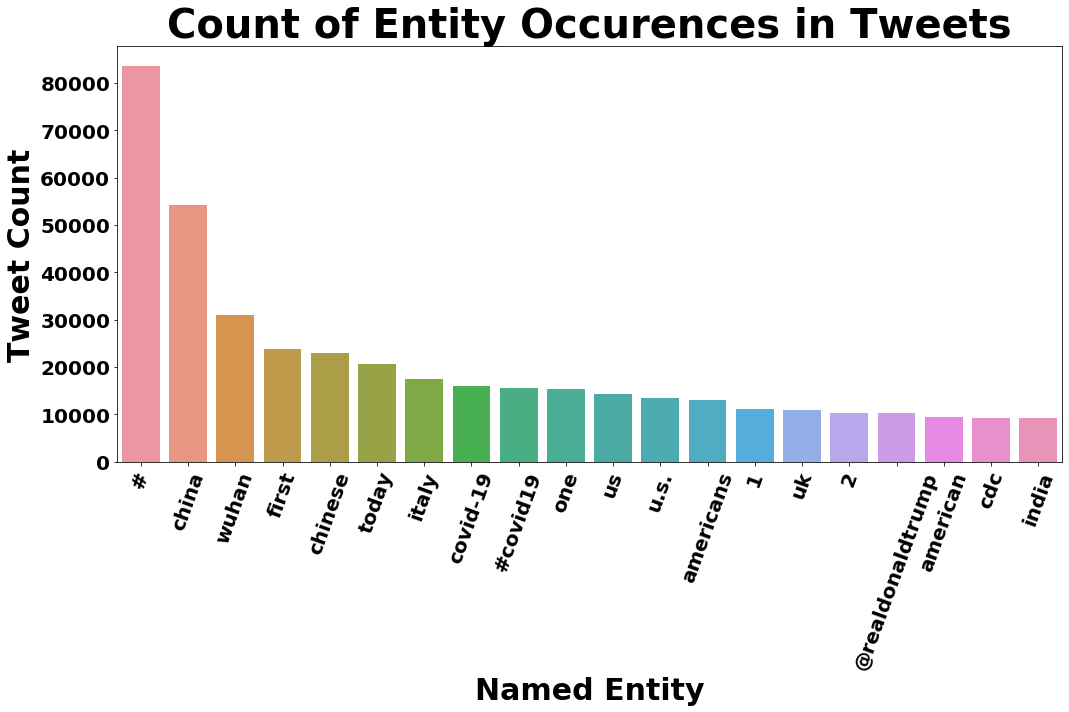

In [305]:
ent_count = plt.subplots(figsize=(15,10))
ent_count = sns.barplot(x='entity', y='count', data=chunk0_ent_count.drop_duplicates('entity').nlargest(20, 'count'))
ent_count.set_title('Count of Entity Occurences in Tweets', fontsize=40, fontweight='bold')
ent_count.set_ylabel('Tweet Count', fontsize=30, fontweight='bold')
ent_count.set_xlabel('Named Entity', fontsize=30, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold', rotation=70)
plt.yticks(fontsize=20, fontweight='bold');
plt.tight_layout()

In [559]:
def ent_count_plot(label):
    ent_count = plt.subplots(figsize=(15,10))
    ent_count = sns.barplot(x='entity', y='count', data=chunk0_ent_count[chunk0_ent_count['label']==label].nlargest(25, 'count'))
    ent_count.set_title('Count of Entity Occurences in Tweets', fontsize=40, fontweight='bold')
    ent_count.set_ylabel('Tweet Count', fontsize=30, fontweight='bold')
    ent_count.set_xlabel('Named Entity ('+label+')', fontsize=30, fontweight='bold')
    plt.xticks(fontsize=20, fontweight='bold', rotation=70)
    plt.yticks(fontsize=20, fontweight='bold');
    plt.tight_layout()

//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 129315 missing from current font.
  font.load_char(ord(s), flags=flags)


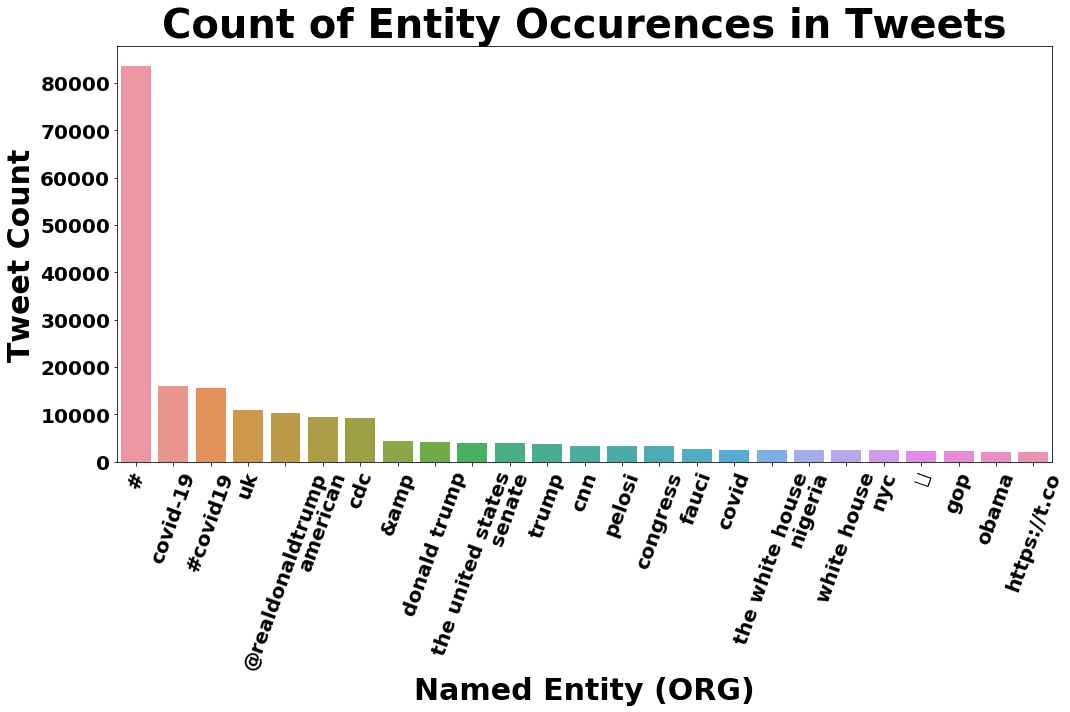

In [560]:
ent_count_plot('ORG')

//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 129315 missing from current font.
  font.load_char(ord(s), flags=flags)


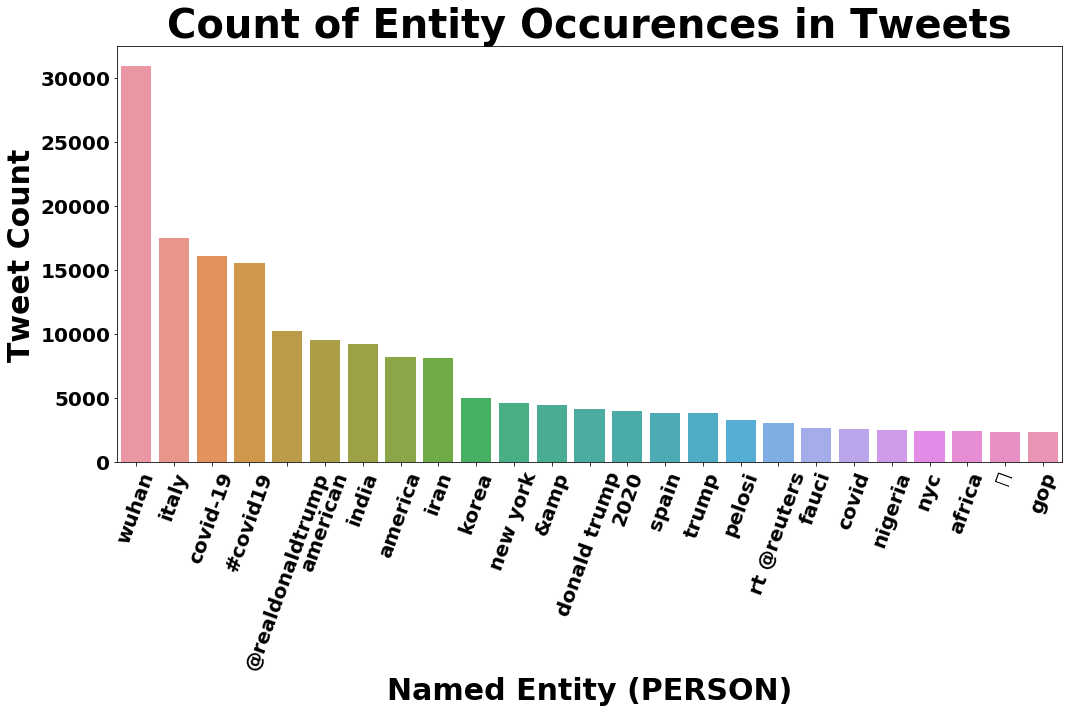

In [561]:
ent_count_plot('PERSON')

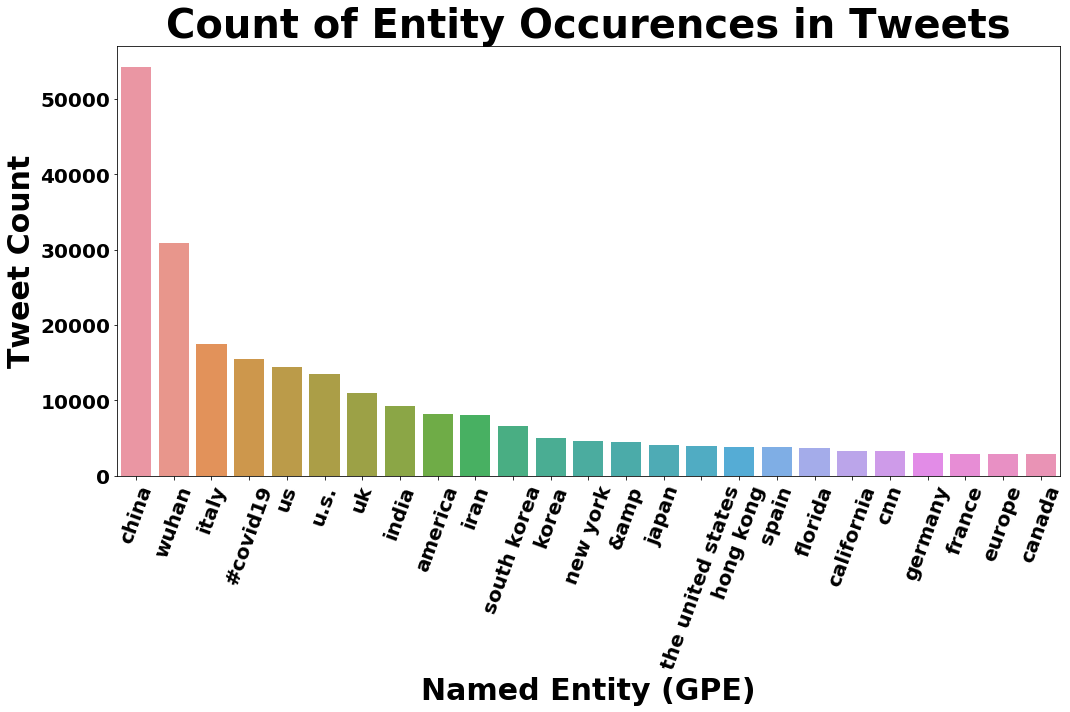

In [562]:
ent_count_plot('GPE')

//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 127475 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128071 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 127475 missing from current font.
  font.load_char(ord(s), flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 128071 missing from current font.
  font.load_char(ord(s), flags=flags)


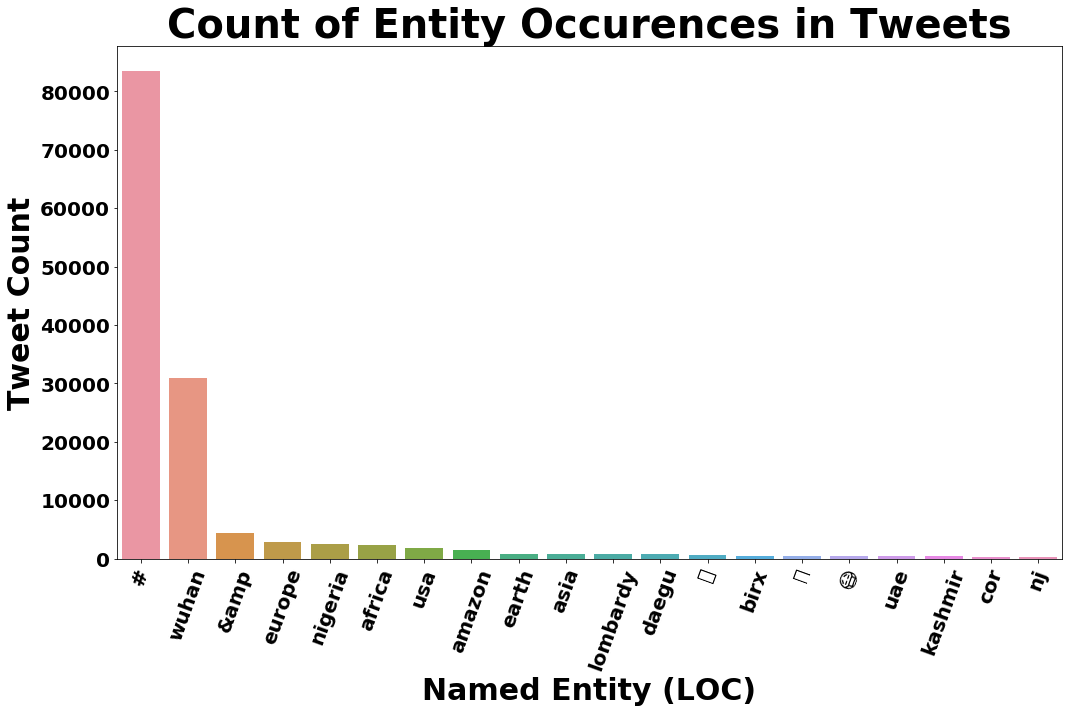

In [310]:
ent_count_plot('LOC')

In [347]:
clean_chunks_5 = pd.read_csv('data/clean_chunks/clean_chunks_5.csv')

In [348]:
clean_chunks_5.head()

,created_at,id,full_text,geo,place,lang
0,2020-03-06 00:10:19+00:00,1.235719e+18,RT @JaneLytv: 5. Unfollow the twitter account ...,NaN,NaN,en
1,2020-03-06 09:51:02+00:00,1.235865e+18,RT @AliyaAlwani: Coronavirus most common sympt...,NaN,NaN,en
2,2020-03-07 05:36:27+00:00,1.236164e+18,RT @TulsiGabbard: South Korea has the ability ...,NaN,NaN,en
3,2020-03-09 22:56:58+00:00,1.237150e+18,"RT @BpRobertReed: O God, protect us against th...",NaN,NaN,en
4,2020-03-11 02:14:19+00:00,1.237562e+18,RT @tastefullytayy: Coronavirus has crossed th...,NaN,NaN,en


In [349]:
clean_chunks_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453084 entries, 0 to 3453083
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   created_at  object 
 1   id          float64
 2   full_text   object 
 3   geo         object 
 4   place       object 
 5   lang        object 
dtypes: float64(1), object(5)
memory usage: 158.1+ MB


In [350]:
clean_chunks_5['created_at'] = pd.to_datetime(clean_chunks_5.created_at, errors='coerce')

In [351]:
clean_chunks_5['created_at'].min()

Timestamp('2020-01-09 01:18:45+0000', tz='UTC')

In [352]:
clean_chunks_5['created_at'].max()

Timestamp('2020-04-05 00:08:19+0000', tz='UTC')

In [353]:
clean_chunks_5.head()

,created_at,id,full_text,geo,place,lang
0,2020-03-06 00:10:19+00:00,1.235719e+18,RT @JaneLytv: 5. Unfollow the twitter account ...,NaN,NaN,en
1,2020-03-06 09:51:02+00:00,1.235865e+18,RT @AliyaAlwani: Coronavirus most common sympt...,NaN,NaN,en
2,2020-03-07 05:36:27+00:00,1.236164e+18,RT @TulsiGabbard: South Korea has the ability ...,NaN,NaN,en
3,2020-03-09 22:56:58+00:00,1.237150e+18,"RT @BpRobertReed: O God, protect us against th...",NaN,NaN,en
4,2020-03-11 02:14:19+00:00,1.237562e+18,RT @tastefullytayy: Coronavirus has crossed th...,NaN,NaN,en


In [354]:
clean_chunks_5.tail()

,created_at,id,full_text,geo,place,lang
3453079,2020-04-02 12:33:53+00:00,1.245691e+18,"RT @agoodfireburns: Weird right, how sending o...",NaN,NaN,en
3453080,2020-04-02 16:23:34+00:00,1.245749e+18,RT @ResourceDesk: Serbia: Other manipulation i...,NaN,NaN,en
3453081,2020-04-02 19:44:56+00:00,1.245799e+18,RT @RepRubenGallego: Tribal communities will s...,NaN,NaN,en
3453082,2020-04-02 19:55:40+00:00,1.245802e+18,RT @LulBit_ME: After COVID-19 ... i promise y’...,NaN,NaN,en
3453083,2020-04-03 23:24:37+00:00,1.246217e+18,RT @weijia: Jared Kushner is in charge of the ...,NaN,NaN,en


In [355]:
clean_chunks_5 = clean_chunks_5.sort_values(by='created_at')

In [356]:
clean_chunks_5.head()

,created_at,id,full_text,geo,place,lang
159836,2020-01-09 01:18:45+00:00,1.215080e+18,RT @lauriechenwords: #Breaking: Chinese health...,NaN,NaN,en
3286230,2020-01-09 19:02:38+00:00,1.215348e+18,RT @CIDRAP: Virologists weigh in on novel #cor...,NaN,NaN,en
99776,2020-01-10 16:40:10+00:00,1.215675e+18,RT @WHOWPRO: Protect yourself &amp; reduce ris...,NaN,NaN,en
3238393,2020-01-10 19:45:34+00:00,1.215721e+18,RT @WHO: Protect yourself &amp; reduce risk fr...,NaN,NaN,en
924473,2020-01-11 14:51:52+00:00,1.216010e+18,RT @CGTNOfficial: China to share with WHO new ...,NaN,NaN,en


In [357]:
clean_chunks_5.tail()

,created_at,id,full_text,geo,place,lang
2951604,NaT,NaN,NaN,en,NaN,NaN
2963087,NaT,NaN,NaN,en,NaN,NaN
2991159,NaT,NaN,NaN,en,NaN,NaN
3154309,NaT,NaN,NaN,en,NaN,NaN
3267717,NaT,NaN,NaN,en,NaN,NaN


In [358]:
clean_chunks_5.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3453084 entries, 159836 to 3267717
Data columns (total 6 columns):
 #   Column      Dtype              
---  ------      -----              
 0   created_at  datetime64[ns, UTC]
 1   id          float64            
 2   full_text   object             
 3   geo         object             
 4   place       object             
 5   lang        object             
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 184.4+ MB


In [361]:
clean_chunks_5 = clean_chunks_5.dropna(subset=['created_at'])

In [362]:
clean_chunks_5.shape

(3453041, 6)

In [363]:
clean_chunks_5.head()

,created_at,id,full_text,geo,place,lang
159836,2020-01-09 01:18:45+00:00,1.215080e+18,RT @lauriechenwords: #Breaking: Chinese health...,NaN,NaN,en
3286230,2020-01-09 19:02:38+00:00,1.215348e+18,RT @CIDRAP: Virologists weigh in on novel #cor...,NaN,NaN,en
99776,2020-01-10 16:40:10+00:00,1.215675e+18,RT @WHOWPRO: Protect yourself &amp; reduce ris...,NaN,NaN,en
3238393,2020-01-10 19:45:34+00:00,1.215721e+18,RT @WHO: Protect yourself &amp; reduce risk fr...,NaN,NaN,en
924473,2020-01-11 14:51:52+00:00,1.216010e+18,RT @CGTNOfficial: China to share with WHO new ...,NaN,NaN,en


In [368]:
clean_chunks_5['month'] = clean_chunks_5.created_at.dt.month
clean_chunks_5['week'] = clean_chunks_5.created_at.dt.week

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [370]:
clean_chunks_5.head()

,created_at,id,full_text,geo,place,lang,month,week
159836,2020-01-09 01:18:45+00:00,1.215080e+18,RT @lauriechenwords: #Breaking: Chinese health...,NaN,NaN,en,1,2
3286230,2020-01-09 19:02:38+00:00,1.215348e+18,RT @CIDRAP: Virologists weigh in on novel #cor...,NaN,NaN,en,1,2
99776,2020-01-10 16:40:10+00:00,1.215675e+18,RT @WHOWPRO: Protect yourself &amp; reduce ris...,NaN,NaN,en,1,2
3238393,2020-01-10 19:45:34+00:00,1.215721e+18,RT @WHO: Protect yourself &amp; reduce risk fr...,NaN,NaN,en,1,2
924473,2020-01-11 14:51:52+00:00,1.216010e+18,RT @CGTNOfficial: China to share with WHO new ...,NaN,NaN,en,1,2


In [379]:
chunk5_week_count = pd.DataFrame(clean_chunks_5.week.value_counts()).reset_index()

In [382]:
chunk5_week_count

,index,week
0,13,732755
1,12,707708
2,11,550875
3,14,537660
4,10,322372
5,5,178229
6,9,154004
7,8,90556
8,6,90392
9,7,87503


In [375]:
clean_chunks_5.month.value_counts()

3    2531052
2     438150
4     349996
1     133843
Name: month, dtype: int64

<BarContainer object of 13 artists>

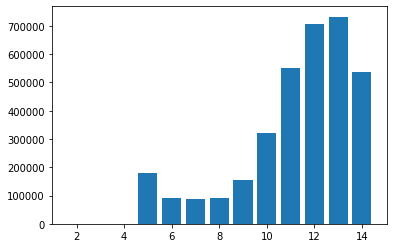

In [381]:
plt.bar(x=chunk5_week_count['index'], height=chunk5_week_count['week'])

In [ ]:
a_string = "A string is more than its parts!"
matches = ["more", "wholesome", "milk"]

if any(x in a_string for x in matches):

In [528]:
china = ['China', 'Chinese', 'china', 'chinese']

china_tweets = []

for tweet in small_tweets['full_text']:
    if any([x in tweet for x in china]):
        china_tweets.append(tweet)
        print('I match')
    else:
        print('keep going')

I match
keep going
I match
I match
I match
keep going
keep going
I match
I match
keep going
keep going
keep going
keep going
keep going
I match
I match
I match
I match
I match
keep going
I match
I match
I match
keep going
I match
I match


In [529]:
china_tweets

['RT @business: An alarming pneumonia outbreak in central China may be due to a previously unidentified coronavirus, according to the WHO htt…',
 "@tezuma75 Why #CCP keep on saying unknown cause of pneumonia? The cause is obviously related to corona virus. Let's just call it #WARS.#CCP just want to dilute the #WARS caused by the barbarian Chinese to kill and eat wild animals, torture the animals.",
 "RT @Echinanews: #BREAKING: The unidentified pneumonia in Wuhan, China's Hubei Province is believed to be a new type of coronavirus, say exp…",
 'TLDR: Not SARS, possibly new coronavirus. Difficult to confirm because patients identified later in infection when viral nucleic acid is low.\n\nExperts search for answers in limited information about mystery pneumonia outbreak in China https://t.co/vIeVhPptIP via @statnews',
 'RT @ChannelNewsAsia: China researchers discover genetic sequencing that possibly links new coronavirus strain to cluster of pneumonia cases…',
 "Virologists weigh in on nov

In [534]:
china_tweets_df = small_tweets[small_tweets['full_text'].str.contains('|'.join(china))]

In [536]:
china_tweets_df.shape

(16, 6)

In [519]:
small_tweets.head(20)

,created_at,id,full_text,geo,place,lang
1,2020-01-09 04:48:42+00:00,1215133271475908608,RT @business: An alarming pneumonia outbreak i...,NaN,NaN,en
2,2020-01-04 05:23:50+00:00,1213330173736738817,"@shehryar_taseer That’s 💯 true , \nCorona viru...",NaN,NaN,en
3,2020-01-09 10:38:40+00:00,1215221343479726081,@tezuma75 Why #CCP keep on saying unknown caus...,NaN,NaN,en
4,2020-01-09 00:53:24+00:00,1215074056313028608,RT @Echinanews: #BREAKING: The unidentified pn...,NaN,NaN,en
5,2020-01-06 14:54:46+00:00,1214198629553950721,"TLDR: Not SARS, possibly new coronavirus. Diff...",NaN,NaN,en
7,2020-01-08 18:03:50+00:00,1214970985465700352,RT @DrMay5: It seems likely that the first pat...,NaN,NaN,en
11,2020-01-09 14:29:06+00:00,1215279333931200512,RT @JorgeCirett: Wuhan pneumonia outbreak: Mys...,NaN,NaN,en
12,2020-01-09 08:59:39+00:00,1215196425128009728,RT @ChannelNewsAsia: China researchers discove...,NaN,NaN,en
13,2020-01-09 03:24:12+00:00,1215112006363009024,Virologists weigh in on novel coronavirus in C...,NaN,NaN,en
14,2020-01-09 11:50:21+00:00,1215239383177142272,"RT @VilleHolmberg: According to WSJ, a novel c...",NaN,NaN,en


In [538]:
clean_chunks_5.shape

(3453041, 8)

In [555]:
clean_chunks_5.id.value_counts()

1239025814349504512    2
1238218335130488832    2
1244690716737048576    2
1243139835096899584    2
1246143246264303616    2
                      ..
1239669652092882944    1
1240056660967604224    1
1238825205134430208    1
1240091822120030208    1
1237751064511819776    1
Name: id, Length: 3452653, dtype: int64

In [558]:
clean_chunks_5[clean_chunks_5['id']==1238218335130488832]['full_text']

2412508    RT @aliengirlllll: Coronavirus cancelling ever...
2083844    RT @doug_hanks: Miami-Dade suspending eviction...
Name: full_text, dtype: object

In [553]:
clean_chunks_5['id'] = clean_chunks_5['id'].astype('int64')

In [1]:
clean_chunks_5.info()

NameError: name 'clean_chunks_5' is not defined